# Tutorial for HN module

In [1]:
# import the necessary packages along with HavNegpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import HavNegpy as dd
%matplotlib qt

In [2]:
# extract the data

filename = 'hn_example_data.txt'
col_names = ['log f', 'log eps2']
df = pd.read_csv(filename, sep=',',index_col=False,usecols = [0,1],names=col_names,header=None,skiprows=2,encoding='unicode_escape',engine='python')

## Example for single HN function

In [3]:
# plot the data 

x,y = df['log f'], df['log eps2']
plt.scatter(x,y)
plt.xlabel('log f [Hz]')
plt.ylabel('log $\epsilon$"')
#plt.legend()
plt.title('Example for HN fitting')

Text(0.5, 1.0, 'Example for HN fitting')

In [4]:
# instantiate the HN module
hn = dd.HN()

**Select the region of interest (ROI) to fit the data using the select range method.**
>The data in ROI is shown as image in the following cells

In [5]:
#select range
hn = dd.HN()
x1,y1 = hn.select_range(x,y)

x_lower_limit 2.513289397886874 x_upper_limit 4.485912085944888


**Plot of the ROI to fit the HN function**
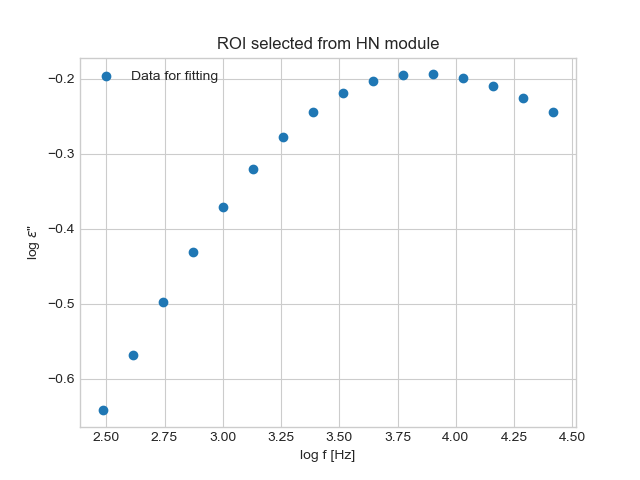

In [6]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_hn()

enter the beta value:0.5
enter the gamma value:1
enter the fm:3.75
enter the deps:0.5
enter the cond:0
enter the s:1
dumped_parameters {'beta': 0.5, 'gamma': 1.0, 'freq': 5623.413251903491, 'deps': 0.5, 'cond': 0.0, 'n': 1.0}


()

In [7]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_hn(x1,y1)

loaded parameters 
 {'beta': 0.5, 'gamma': 1.0, 'freq': 5623.413251903491, 'deps': 0.5, 'cond': 0.0, 'n': 1.0}


**Plot of the initial fit based on the supplied parameters**
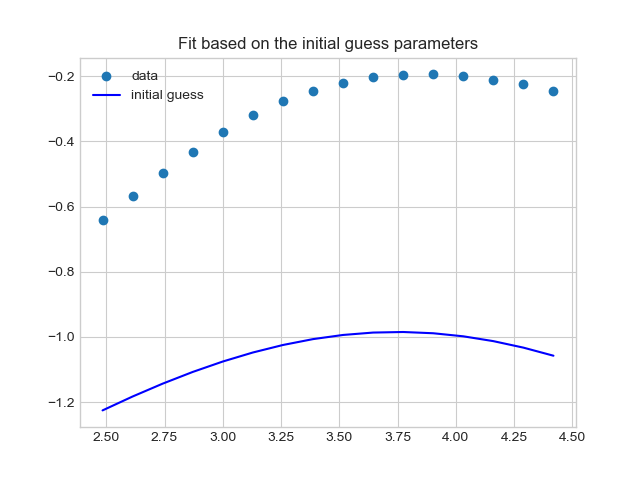

In [8]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- Hn-flank, 4 -- double HN, 5 -- double HN with cond:1
0.7273425853564801 0.3573567759170141 2006.9131032111839 3.2253430067505833
log fmax: 3.853735601755044
fit parameters dumped for next iteration {'beta': 0.7273425853564801, 'gamma': 0.3573567759170141, 'freq': 2006.9131032111839, 'deps': 3.2253430067505833, 'cond': 0, 'n': 0}


**Plot of the final fit of the HN function**
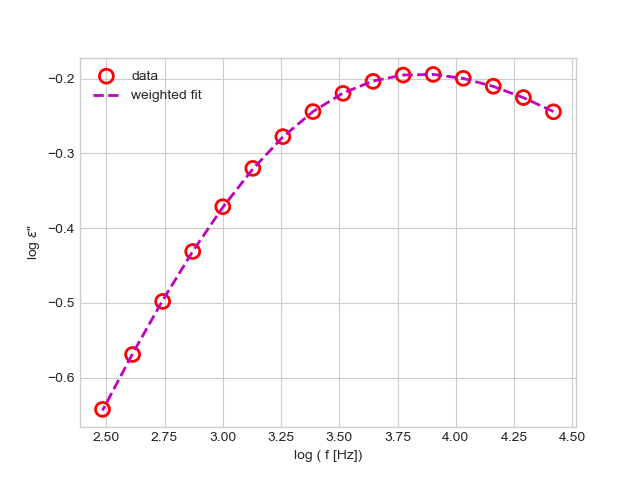

**An analysis file has to be created only once during the whole run (i.e. all fit runs can be saved in the same file, unless you change the function or require saving separate processes in separate files.)**

In [9]:
# before saving fit results an analysis file has to be created using create_analysis file method

hn.create_analysis_file()


Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- HN-flank, 4 -- double HN, 5 -- double HN with cond:1
Enter the analysis_file_name:hn_fit.TXT
file did not exist, created hn_fit.TXT


()

In [10]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_hn(1)

()

## HN function together with conductivity contribution.
**We will use the same data set but will include the conductivity slope for analysis.**

In [11]:
#select range
# select peak along with conductivity slope
hn = dd.HN()
x1,y1 = hn.select_range(x,y)

x_lower_limit 1.0958643497573908 x_upper_limit 4.588408230078855


In [12]:
# view the selected data
plt.scatter(x1,y1)
plt.xlabel('log f [Hz]')
plt.ylabel('log $\epsilon$"')
plt.legend()
plt.title('Example for fitting HN with conducitivity')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Example for fitting HN with conducitivity')

**ROI selected for fitting**
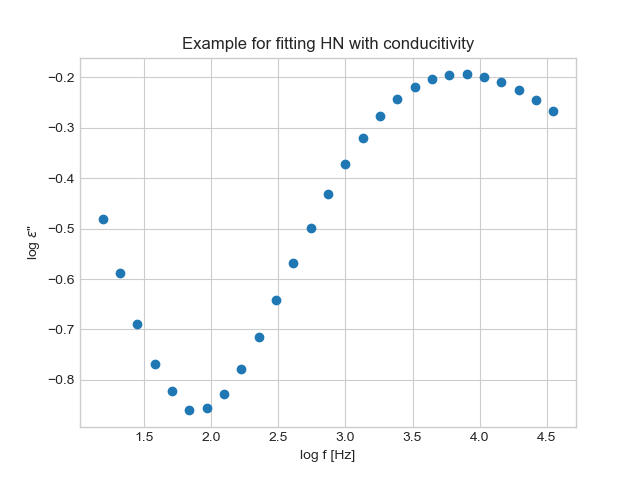

In [13]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_hn()

enter the beta value:0.7
enter the gamma value:0.35
enter the fm:3.85
enter the deps:3.2
enter the cond:15
enter the s:1
dumped_parameters {'beta': 0.7, 'gamma': 0.35, 'freq': 7079.457843841381, 'deps': 3.2, 'cond': 15.0, 'n': 1.0}


()

In [14]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_hn(x1,y1)

loaded parameters 
 {'beta': 0.7, 'gamma': 0.35, 'freq': 7079.457843841381, 'deps': 3.2, 'cond': 15.0, 'n': 1.0}


**Plot of the initial fit based on the supplied parameters**
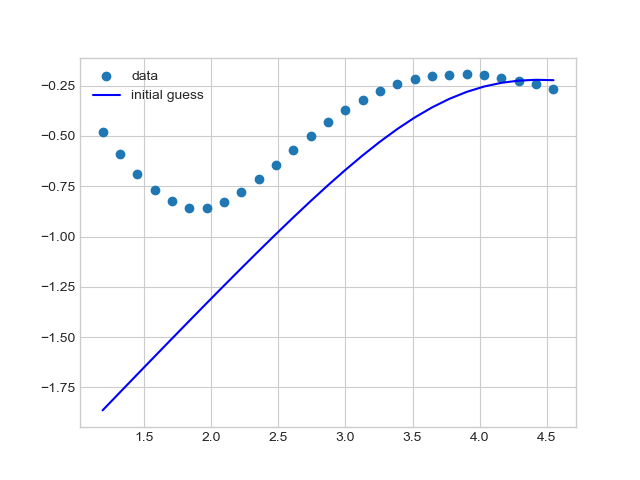

In [15]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- Hn-flank, 4 -- double HN, 5 -- double HN with cond:2
0.798908796474354 0.254093515593339 1497.6831301889817 3.5423194604368 4.8044161604766025 0.9999999999999999
log fmax: 3.832106019438948
fit parameters dumped for next iteration {'beta': 0.798908796474354, 'gamma': 0.254093515593339, 'freq': 1497.6831301889817, 'deps': 3.5423194604368, 'cond': 4.8044161604766025, 'n': 0.9999999999999999}


**Plot of the final fit of the HN function with conductivity**
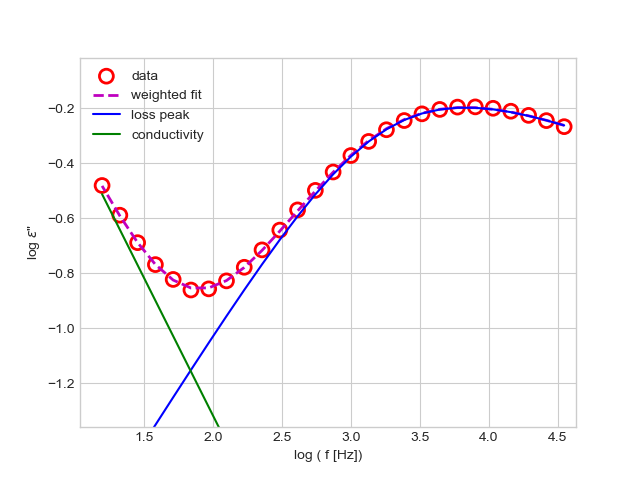

In [16]:
# before saving fit results an analysis file has to be created using create_analysis file methodd

hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- HN-flank, 4 -- double HN, 5 -- double HN with cond:2
Enter the analysis_file_name:hn_cond_fit.TXT
file did not exist, created hn_cond_fit.TXT


()

In [17]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_hn(1)

()

## Fitting example for double HN function
**We will now look at an example to fit two HN functions using a new datafile**

In [18]:
filename = 'double_hn_example_data.txt'
col_names = ['log f', 'log eps2']
df2 = pd.read_csv(filename, sep=',',index_col=False,usecols = [0,1],names=col_names,header=None,skiprows=2,encoding='unicode_escape',engine='python')

In [19]:
#select range
# select peak along with conductivity slope
hn = dd.HN()
x,y = df2['log f'], df2['log eps2']
x1,y1 = hn.select_range(x,y)

x_lower_limit 0.11872398543184204 x_upper_limit 4.048848855359001


In [20]:
# view the selected data
plt.scatter(x1,y1,label='example data')
plt.xlabel('log f [Hz]')
plt.ylabel('log $\epsilon$"')
plt.legend()
plt.title('Example for fitting double HN function')

Text(0.5, 1.0, 'Example for fitting double HN function')

**ROI selected for fitting**
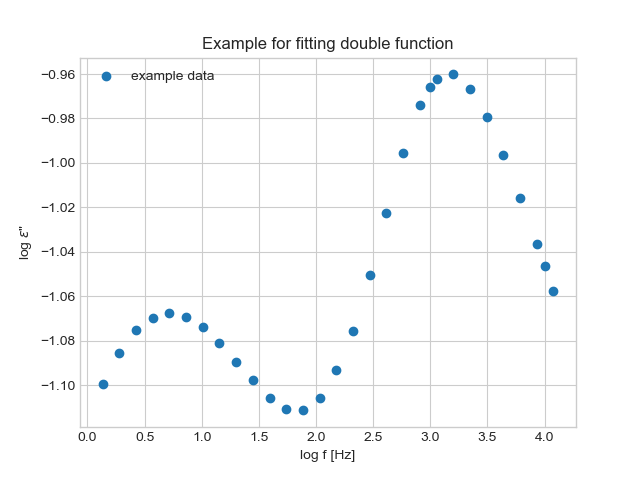

In [21]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created

hn.dump_parameters_double_hn()

enter the beta1 value:0.5
enter the gamma1 value:1
enter the fmax1:0.76
enter the deps1:0.35
enter the beta2 value:0.5
enter the gamma2 value:1
enter the fmax2:3.25
enter the deps2:0.7
enter the cond:0
enter the s:1
dumped_parameters {'beta1': 0.5, 'gamma1': 1.0, 'freq1': 5.7543993733715695, 'deps1': 0.35, 'beta2': 0.5, 'gamma2': 1.0, 'freq2': 1778.2794100389228, 'deps2': 0.7, 'cond': 0.0, 'n': 1.0}


()

In [22]:
# view the initial fit based on the dumped parameters
# the plot is shown as a image in the next cell

hn.initial_view_double_hn(x1,y1)

loaded parameters 
 {'beta1': 0.5, 'gamma1': 1.0, 'freq1': 5.7543993733715695, 'deps1': 0.35, 'beta2': 0.5, 'gamma2': 1.0, 'freq2': 1778.2794100389228, 'deps2': 0.7, 'cond': 0.0, 'n': 1.0}


**Plot of the initial fit based on the supplied parameters**
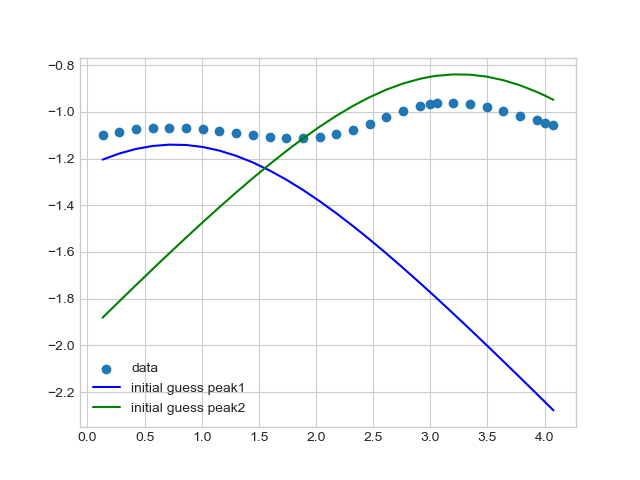

In [23]:
# perform least squares fitting
# the plot is shown as a image in the next cell

hn.fit(x1,y1)

Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- Hn-flank, 4 -- double HN, 5 -- double HN with cond:4
[0.5, 1.0, 5.7543993733715695, 0.35, 0.5, 1.0, 1778.2794100389228, 0.7]
log fmax1: 0.6528760482656042 
log fmax2: 3.3454996773912202
fit parameters dumped for next iteration {'beta1': 0.5574923893637207, 'gamma1': 0.32191102439091196, 'freq1': 0.6634391099941143, 'deps1': 0.6070123067438288, 'beta2': 0.9684862515337489, 'gamma2': 0.19288873795787148, 'freq2': 539.4342107551406, 'deps2': 0.37175853830216565, 'cond': 0, 'n': 1}


**Plot of the final fit of the double HN function**
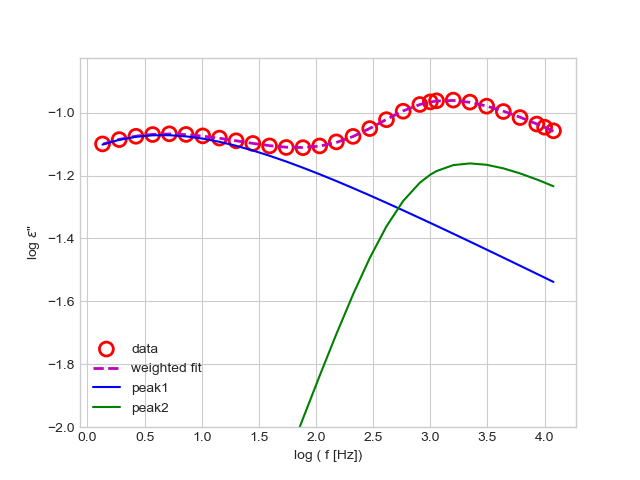

In [24]:
# before saving fit results an analysis file has to be created using create_analysis file method

hn.create_analysis_file()

Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:n
Choose the fit function
 1 -- HN, 2 -- HN with cond, 3 -- HN-flank, 4 -- double HN, 5 -- double HN with cond:4
Enter the analysis_file_name:double_hn.TXT
file did not exist, created double_hn.TXT


()

In [25]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

hn.save_fit_double_HN(1)

()